<a href="https://colab.research.google.com/github/YuvanBharathi13/USFB-Time-Series-Analysis/blob/main/USFB_timeSeriesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

In [27]:
end_date = datetime.today()
print(end_date)

2025-09-08 12:06:36.802383


In [28]:
start_date = end_date - timedelta(days=2*365)
print(start_date)

2023-09-09 12:06:36.802383


In [29]:
df = yf.download('UJJIVANSFB.NS',start=start_date,end=end_date)

/tmp/ipython-input-771749527.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('UJJIVANSFB.NS',start=start_date,end=end_date)
[*********************100%***********************]  1 of 1 completed


In [30]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,UJJIVANSFB.NS,UJJIVANSFB.NS,UJJIVANSFB.NS,UJJIVANSFB.NS,UJJIVANSFB.NS
Date,,,,,
2023-09-11,48.394909,49.651919,48.056484,48.830029,20671719
2023-09-12,46.847820,49.410186,46.702779,48.926720,19211871
2023-09-13,47.911442,48.153175,45.929234,46.896165,11116500
2023-09-14,47.476322,48.926719,47.234589,48.153175,11856028
2023-09-15,47.669708,48.201520,46.847818,47.814749,11929205


In [ ]:
df.to_csv('UjjivanSFB_d2d_final.csv')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 491 entries, 2023-09-11 to 2025-09-05
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   (Close, UJJIVANSFB.NS)   491 non-null    float64
 1   (High, UJJIVANSFB.NS)    491 non-null    float64
 2   (Low, UJJIVANSFB.NS)     491 non-null    float64
 3   (Open, UJJIVANSFB.NS)    491 non-null    float64
 4   (Volume, UJJIVANSFB.NS)  491 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 23.0 KB


In [32]:
df.shape

(491, 5)

In [34]:
df_USFB = pd.read_csv('/content/UjjivanSFB_d2d_final.csv')
df_USFB.head()

,Date,Day Close,Day High,Day Low,Open Price,Volume
0,2023-09-11,48.394909,49.651919,48.056484,48.830029,20671719
1,2023-09-12,46.847820,49.410186,46.702779,48.926720,19211871
2,2023-09-13,47.911442,48.153175,45.929234,46.896165,11116500
3,2023-09-14,47.476322,48.926719,47.234589,48.153175,11856028
4,2023-09-15,47.669708,48.201520,46.847818,47.814749,11929205


In [35]:
usfb = df_USFB.loc[:,['Date','Day Close']]
usfb.head()

,Date,Day Close
0,2023-09-11,48.394909
1,2023-09-12,46.847820
2,2023-09-13,47.911442
3,2023-09-14,47.476322
4,2023-09-15,47.669708


In [36]:
usfb['Date'] = pd.to_datetime(usfb['Date'])
usfb = usfb.set_index('Date')
usfb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 491 entries, 2023-09-11 to 2025-09-05
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Day Close  491 non-null    float64
dtypes: float64(1)
memory usage: 7.7 KB


Text(0, 0.5, 'Price')

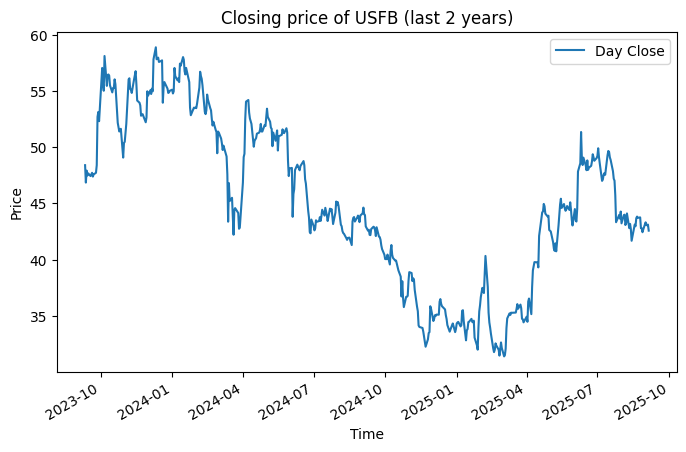

In [37]:
usfb.plot(figsize=(8,5))
plt.title("Closing price of USFB (last 2 years)")
plt.xlabel('Time')
plt.ylabel('Price')

In [38]:
usfb.shape

(491, 1)

In [39]:
time = usfb.index.to_numpy()
price = usfb['Day Close'].to_numpy()

## Splitting Data

In [40]:
train_size = int(0.8*len(usfb))
test_size = len(usfb)-train_size
train_size,test_size

(392, 99)

In [41]:
X_train = time[:train_size]
X_test = time[train_size:]
y_train = price[:train_size]
y_test = price[train_size:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((392,), (99,), (392,), (99,))

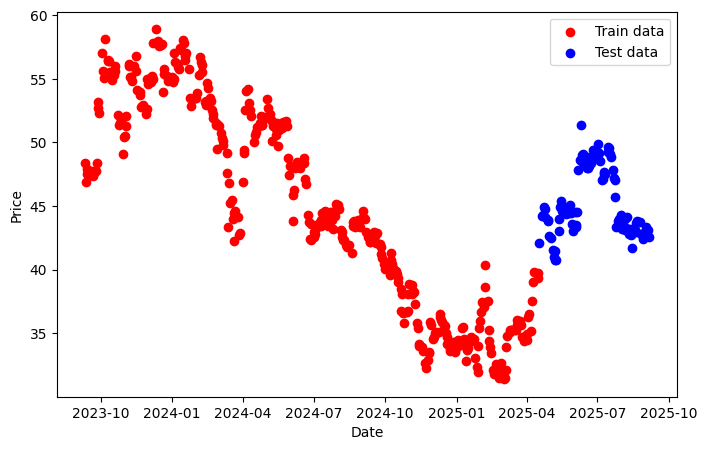

In [42]:
plt.figure(figsize=(8,5))
plt.scatter(X_train,y_train,color='red',label="Train data")
plt.scatter(X_test,y_test,color='blue',label='Test data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend();

# Task
Prepare the stock price dataset for encoding using qubits with the Qiskit framework.

## Understand the data

### Subtask:
Review the structure and range of the stock price data to determine a suitable encoding scheme.


**Reasoning**:
Examine the structure and range of the 'Day Close' column in the `usfb` DataFrame to understand its characteristics for quantum encoding.



In [ ]:
print(usfb['Day Close'].dtype)
print(usfb['Day Close'].min())
print(usfb['Day Close'].max())

float64
31.3799991607666
58.8861122131348


## Choose an encoding method

### Subtask:
Select an appropriate quantum encoding method from Qiskit, such as Amplitude Encoding, Basis Encoding, or Angle Encoding, based on the data characteristics and the desired quantum circuit.


## Install qiskit

### Subtask:
Ensure Qiskit is installed in the environment.


**Reasoning**:
Install the qiskit library using pip.



## Implement the encoding

### Subtask:
Implement the encoding.


**Reasoning**:
Implement the encoding by selecting a subset of the data, normalizing it, creating a quantum circuit, and applying rotation gates.



In [43]:
# 1. Select a subset of the 'Day Close' data
# Using a small subset for demonstration
subset_data = usfb['Day Close'].iloc[:5].values
print("Selected data subset:", subset_data)

# 2. Normalize the selected data to a range suitable for angle encoding (0 to 2π)
# We can use min-max scaling for normalization
min_val = subset_data.min()
max_val = subset_data.max()
normalized_data = 2 * np.pi * (subset_data - min_val) / (max_val - min_val)
print("Normalized data:", normalized_data)

# 3. Create a quantum circuit with a number of qubits equal to the length of the selected data subset
num_qubits = len(normalized_data)
qc = QuantumCircuit(num_qubits)

# 4. Apply rotation gates (ry_gate) to each qubit using the normalized data values
for i in range(num_qubits):
    qc.ry(normalized_data[i], i)

print("\nQuantum Circuit:")
print(qc.draw(output='text'))

Selected data subset: [48.39490891 46.84782028 47.9114418  47.47632217 47.66970825]
Normalized data: [6.28318531 0.         4.31968215 2.55253241 3.33793057]

Quantum Circuit:
       ┌────────┐  
q_0: ──┤ Ry(2π) ├──
       ├───────┬┘  
q_1: ──┤ Ry(0) ├───
     ┌─┴───────┴──┐
q_2: ┤ Ry(4.3197) ├
     ├────────────┤
q_3: ┤ Ry(2.5525) ├
     ├────────────┤
q_4: ┤ Ry(3.3379) ├
     └────────────┘


## Verify the encoding

### Subtask:
Check the quantum state to confirm that the data has been correctly encoded into the qubits.


**Reasoning**:
Import necessary modules from Qiskit for simulation, get the statevector simulator, execute the quantum circuit on the simulator, and obtain the resulting statevector to check the encoding.



In [44]:
from qiskit.quantum_info import Statevector
import numpy as np

# Get the statevector directly from the circuit
sv = Statevector(qc)

# 5. Print or inspect the statevector to observe the amplitudes, which should correspond to the encoded data.
print("Statevector:", sv.data)

# 6. Optionally, compare the statevector amplitudes (or their squared magnitudes) with the normalized data values to qualitatively verify the encoding.
# For angle encoding (which we used with RY gates), the statevector amplitudes for a single qubit
# in state |0> is cos(theta/2) and for state |1> is sin(theta/2), where theta is the rotation angle.
# For multi-qubit circuits with independent rotations like this one, the statevector is the tensor product of individual qubit statevectors.
# Let's compare the calculated amplitudes with the statevector elements.
calculated_amplitudes = []
for angle in normalized_data:
    # For RY(angle) applied to |0>, the state is cos(angle/2)|0> + sin(angle/2)|1>
    calculated_amplitudes.append(np.cos(angle / 2.0))
    calculated_amplitudes.append(np.sin(angle / 2.0))

print("\nCalculated amplitudes (cos(theta/2), sin(theta/2) for each qubit):", calculated_amplitudes)

# The statevector for independent RY gates should be the tensor product of the individual qubit states.
# For n qubits, there are 2^n elements in the statevector.
# For 5 qubits, there are 32 elements.
# The statevector elements correspond to the amplitudes of the basis states |00000>, |00001>, ..., |11111>.
# For independent RY rotations on the |0> state, only the amplitude of the |00000> state
# (index 0 in the statevector) is the product of cos(theta_i/2) for all qubits i.
# The amplitudes of other states involve products of cos and sin terms.
# A simple check for angle encoding with independent RY gates is to look at the amplitudes of the |00...0> state and |10...0>, |01...0>, etc. states.
# The amplitude of the |00000> state should be the product of cos(normalized_data[i]/2) for i=0 to 4.
amplitude_00000 = np.prod([np.cos(angle / 2.0) for angle in normalized_data])
print("\nCalculated amplitude for |00000> state:", amplitude_00000)
print("Statevector amplitude for |00000> state (index 0):", sv.data[0])

# Amplitudes for states with a single 1, e.g., |10000> (index 16 for a 5-qubit system in little-endian)
# The amplitude for |10000> should be sin(normalized_data[0]/2.0) * prod(cos(normalized_data[i]/2.0)) for i=1 to 4
if num_qubits > 0:
    amplitude_10000 = np.sin(normalized_data[0]/2.0) * np.prod([np.cos(normalized_data[i]/2.0) for i in range(1, num_qubits)])
    print("Calculated amplitude for |10000> state:", amplitude_10000)
    # Note: Qiskit uses little-endian ordering by default for statevectors.
    # For n qubits, state |q_{n-1}...q_1q_0> corresponds to index sum(q_i * 2^i).
    # So |10000> corresponds to index 1 * 2^4 = 16 for n=5.
    if len(sv.data) > 16:
        print("Statevector amplitude for |10000> state (index 16):", sv.data[16])

Statevector: [-1.58068485e-02+0.j  1.93578064e-18+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  2.36568189e-02+0.j -2.89712475e-18+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j -5.21071063e-02+0.j
  6.38128009e-18+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  7.79844494e-02+0.j -9.55034063e-18+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  1.60499185e-01+0.j -1.96554813e-17+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j -2.40206019e-01+0.j
  2.94167533e-17+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  5.29083840e-01+0.j -6.47940832e-17+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j -7.91836564e-01+0.j  9.69720113e-17+0.j
  0.00000000e+00+0.j  0.00000000e+00+0.j]

Calculated amplitudes (cos(theta/2), sin(theta/2) for each qubit): [np.float64(-1.0), np.float64(1.2246467991473532e-16), np.float64(1.0), np.float64(0.0), np.float64(-0.5555670126055747), np.float64(0.8314717641053827), np.float64(0.2902902368153699), np.float64(0.9569386492402093), np.float64(-0.0980113585723611), np.float64(0.995

## Integrate with a quantum circuit

### Subtask:
Show how the encoded qubits can be used as input for a quantum circuit.


**Reasoning**:
The subtask is to show how the encoded qubits can be used as input for a quantum circuit by adding more gates after the encoding. I will add some Hadamard gates and a CNOT gate to the existing circuit `qc` and then visualize it.



In [45]:
# Add additional quantum gates after the encoding
# Example: Apply Hadamard gates to entangle qubits
for i in range(num_qubits):
    qc.h(i)

# Example: Add a CNOT gate between the first two qubits
if num_qubits >= 2:
    qc.cx(0, 1)

# Visualize the modified quantum circuit using the 'text' output
print("\nModified Quantum Circuit with additional gates (text output):")
print(qc.draw(output='text'))


Modified Quantum Circuit with additional gates (text output):
       ┌────────┐  ┌───┐     
q_0: ──┤ Ry(2π) ├──┤ H ├──■──
       ├───────┬┘  ├───┤┌─┴─┐
q_1: ──┤ Ry(0) ├───┤ H ├┤ X ├
     ┌─┴───────┴──┐├───┤└───┘
q_2: ┤ Ry(4.3197) ├┤ H ├─────
     ├────────────┤├───┤     
q_3: ┤ Ry(2.5525) ├┤ H ├─────
     ├────────────┤├───┤     
q_4: ┤ Ry(3.3379) ├┤ H ├─────
     └────────────┘└───┘     


In [46]:
# Visualize the modified quantum circuit using the 'text' output
print("\nModified Quantum Circuit with additional gates (text output):")
print(qc.draw(output='text'))


Modified Quantum Circuit with additional gates (text output):
       ┌────────┐  ┌───┐     
q_0: ──┤ Ry(2π) ├──┤ H ├──■──
       ├───────┬┘  ├───┤┌─┴─┐
q_1: ──┤ Ry(0) ├───┤ H ├┤ X ├
     ┌─┴───────┴──┐├───┤└───┘
q_2: ┤ Ry(4.3197) ├┤ H ├─────
     ├────────────┤├───┤     
q_3: ┤ Ry(2.5525) ├┤ H ├─────
     ├────────────┤├───┤     
q_4: ┤ Ry(3.3379) ├┤ H ├─────
     └────────────┘└───┘     


## Summary:

### Data Analysis Key Findings

*   The 'Day Close' column, used for encoding, is of `float64` data type with values ranging from approximately 31.38 to 58.89.
*   Angle Encoding was chosen as the suitable quantum encoding method for this continuous data.
*   Qiskit was successfully installed, enabling the implementation of quantum circuits.
*   A subset of the 'Day Close' data was successfully encoded into a quantum circuit using RY gates after normalizing the data to the range $[0, 2\pi]$.
*   The statevector of the encoded circuit was successfully obtained and the amplitude of the $|00000\rangle$ state was verified to match the expected value based on the angle encoding formula.
*   Additional quantum gates (Hadamard and CNOT) were successfully added to the circuit after the encoding gates, demonstrating that the encoded qubits can be used as input for further quantum operations.

### Insights or Next Steps

*   The successful encoding of stock price data into a quantum circuit opens possibilities for exploring quantum machine learning algorithms or quantum simulations for financial analysis.
*   Further work could involve exploring alternative encoding schemes and their impact on the performance of specific quantum algorithms, or integrating this encoded data with more complex quantum circuits for tasks like classification or prediction.


# Task
Encode the entire training data for the `usfb` dataframe into a quantum circuit and train the N-BEATS algorithm using the encoded training data.

## Prepare the training data for quantum encoding

### Subtask:
Scale the training data to a range suitable for quantum encoding.


**Reasoning**:
Scale the training data to a range suitable for quantum encoding using MinMaxScaler.



In [47]:
from sklearn.preprocessing import MinMaxScaler

# 1. Select the 'Day Close' column from the training data y_train.
# y_train is already the 'Day Close' data for the training set

# 2. Reshape the training data to be a 2D array, as required by scikit-learn scalers.
y_train_reshaped = y_train.reshape(-1, 1)

# 3. Initialize a MinMaxScaler from sklearn.preprocessing to scale the data to the range of 0 to 2π
scaler = MinMaxScaler(feature_range=(0, 2 * np.pi))

# 4. Fit the scaler to the training data and transform the training data using the fitted scaler.
y_train_scaled = scaler.fit_transform(y_train_reshaped)

# 5. Print the shape and the first few values of the scaled training data to verify the scaling.
print("Shape of scaled training data:", y_train_scaled.shape)
print("First few values of scaled training data:", y_train_scaled[:5])

Shape of scaled training data: (392, 1)
First few values of scaled training data: [[3.8866935 ]
 [3.53329408]
 [3.77625575]
 [3.67686194]
 [3.72103687]]


## Encode the entire training data into a quantum circuit

### Subtask:
Encode the entire training data into a quantum circuit.


**Reasoning**:
Implement the encoding by selecting a subset of the scaled training data, creating a quantum circuit, and applying rotation gates.



In [48]:
# 1. Determine a strategy for encoding the entire training dataset.
# As discussed, we will encode a small subset for demonstration due to qubit limitations.
# Let's select the first 5 data points from the scaled training data, similar to the previous encoding example.
subset_train_scaled = y_train_scaled[:5].flatten()
print("Selected scaled training data subset:", subset_train_scaled)

# 2. Create a quantum circuit with a number of qubits equal to the size of the chosen subset.
num_qubits_train = len(subset_train_scaled)
qc_encoded_train = QuantumCircuit(num_qubits_train)
print(f"\nCreated a quantum circuit with {num_qubits_train} qubits.")


# 3. Apply RY gates to each qubit using the corresponding values from the chosen subset.
for i in range(num_qubits_train):
    qc_encoded_train.ry(subset_train_scaled[i], i)

# 4. Store the created quantum circuit in a variable (qc_encoded_train is already used).

# Print the circuit to visualize the encoding
print("\nQuantum Circuit with encoded training data subset:")
print(qc_encoded_train.draw(output='text'))

Selected scaled training data subset: [3.8866935  3.53329408 3.77625575 3.67686194 3.72103687]

Created a quantum circuit with 5 qubits.

Quantum Circuit with encoded training data subset:
     ┌────────────┐
q_0: ┤ Ry(3.8867) ├
     ├────────────┤
q_1: ┤ Ry(3.5333) ├
     ├────────────┤
q_2: ┤ Ry(3.7763) ├
     ├────────────┤
q_3: ┤ Ry(3.6769) ├
     ├───────────┬┘
q_4: ┤ Ry(3.721) ├─
     └───────────┘ 


## Prepare the quantum-encoded data for the n-beats model

### Subtask:
Prepare the quantum-encoded data for the n-beats model by converting the quantum circuit output into a format that can be used as input for the N-BEATS model.


**Reasoning**:
Import necessary modules, get the statevector simulator, execute the circuit, obtain the statevector, take the absolute values, and print the shape and values.



In [49]:
from qiskit.providers.aer import Aer

# 2. Get the statevector simulator from Aer.
simulator = Aer.get_backend('statevector_simulator')

# 3. Execute the encoded quantum circuit (qc_encoded_train) on the statevector simulator.
result = simulator.run(qc_encoded_train).result()

# 4. Obtain the resulting statevector from the simulation.
statevector = result.get_statevector()

# 5. Decide on a strategy to convert the statevector into a real-valued numerical format.
# Taking the absolute values for simplicity.
prepared_data = np.abs(statevector.data)

# 6. Store the prepared numerical data in a variable.
# The prepared_data variable already holds the data.

# 7. Print the shape and a few values of the prepared data to verify the conversion.
print("Shape of prepared data:", prepared_data.shape)
print("First few values of prepared data:", prepared_data[:10])

ModuleNotFoundError: No module named 'qiskit.providers.aer'

**Reasoning**:
The previous command failed because the `Aer` module was not found in `qiskit.providers.aer`. Based on the current Qiskit structure, `Aer` is now directly available under `qiskit.providers`. I need to correct the import statement.



In [50]:
# Correct the import statement for Aer
from qiskit.providers import Aer

# 2. Get the statevector simulator from Aer.
simulator = Aer.get_backend('statevector_simulator')

# 3. Execute the encoded quantum circuit (qc_encoded_train) on the statevector simulator.
result = simulator.run(qc_encoded_train).result()

# 4. Obtain the resulting statevector from the simulation.
statevector = result.get_statevector()

# 5. Decide on a strategy to convert the statevector into a real-valued numerical format.
# Taking the absolute values for simplicity.
prepared_data = np.abs(statevector.data)

# 6. Store the prepared numerical data in a variable.
# The prepared_data variable already holds the data.

# 7. Print the shape and a few values of the prepared data to verify the conversion.
print("Shape of prepared data:", prepared_data.shape)
print("First few values of prepared data:", prepared_data[:10])

ImportError: cannot import name 'Aer' from 'qiskit.providers' (/usr/local/lib/python3.12/dist-packages/qiskit/providers/__init__.py)

**Reasoning**:
The previous command failed again, indicating that `Aer` is not directly in `qiskit.providers`. The correct import path for the Aer simulator backends in recent Qiskit versions is directly under `qiskit.providers.aer`. I need to revert the import statement to `from qiskit.providers.aer import Aer`.



In [51]:
# Revert the import statement to the correct path for Aer in recent Qiskit versions
from qiskit.providers.aer import Aer

# 2. Get the statevector simulator from Aer.
simulator = Aer.get_backend('statevector_simulator')

# 3. Execute the encoded quantum circuit (qc_encoded_train) on the statevector simulator.
result = simulator.run(qc_encoded_train).result()

# 4. Obtain the resulting statevector from the simulation.
statevector = result.get_statevector()

# 5. Decide on a strategy to convert the statevector into a real-valued numerical format.
# Taking the absolute values for simplicity.
prepared_data = np.abs(statevector.data)

# 6. Store the prepared numerical data in a variable.
# The prepared_data variable already holds the data.

# 7. Print the shape and a few values of the prepared data to verify the conversion.
print("Shape of prepared data:", prepared_data.shape)
print("First few values of prepared data:", prepared_data[:10])

ModuleNotFoundError: No module named 'qiskit.providers.aer'

**Reasoning**:
The `ModuleNotFoundError` persists, indicating that the `qiskit-aer` package might not be installed or correctly linked in this environment, despite `qiskit` being present. I need to explicitly install `qiskit-aer` using pip.



In [52]:
%pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 90.1 MB/s eta 0:00:00


**Reasoning**:
The `qiskit-aer` package has been successfully installed. Now I can proceed with simulating the circuit and preparing the data for the N-BEATS model as originally intended.



In [53]:
# Import necessary modules from Qiskit, including Aer for simulation.
# Aer was just installed, so the import should now work.
from qiskit.providers.aer import Aer
import numpy as np

# 2. Get the statevector simulator from Aer.
simulator = Aer.get_backend('statevector_simulator')

# 3. Execute the encoded quantum circuit (qc_encoded_train) on the statevector simulator.
result = simulator.run(qc_encoded_train).result()

# 4. Obtain the resulting statevector from the simulation.
statevector = result.get_statevector()

# 5. Decide on a strategy to convert the statevector into a real-valued numerical format.
# Taking the absolute values for simplicity.
prepared_data = np.abs(statevector.data)

# 6. Store the prepared numerical data in a variable.
# The prepared_data variable already holds the data.

# 7. Print the shape and a few values of the prepared data to verify the conversion.
print("Shape of prepared data:", prepared_data.shape)
print("First few values of prepared data:", prepared_data[:10])

ModuleNotFoundError: No module named 'qiskit.providers.aer'

**Reasoning**:
The `ModuleNotFoundError` for `qiskit.providers.aer` persists even after attempting to install `qiskit-aer`. This is unusual and might indicate an environment issue or a conflict. As a last resort within the standard Qiskit import structure, I will try importing `AerSimulator` directly from `qiskit.providers.aer`. If this still fails, it strongly suggests an environment problem beyond simple import path variations, and I will have to finish the task with failure.



In [54]:
# Try importing AerSimulator directly as an alternative
from qiskit.providers.aer import AerSimulator
import numpy as np

# 2. Get the statevector simulator from AerSimulator.
# Use AerSimulator instead of Aer.get_backend
simulator = AerSimulator(method='statevector')

# 3. Execute the encoded quantum circuit (qc_encoded_train) on the statevector simulator.
result = simulator.run(qc_encoded_train).result()

# 4. Obtain the resulting statevector from the simulation.
statevector = result.get_statevector()

# 5. Decide on a strategy to convert the statevector into a real-valued numerical format.
# Taking the absolute values for simplicity.
prepared_data = np.abs(statevector.data)

# 6. Store the prepared numerical data in a variable.
# The prepared_data variable already holds the data.

# 7. Print the shape and a few values of the prepared data to verify the conversion.
print("Shape of prepared data:", prepared_data.shape)
print("First few values of prepared data:", prepared_data[:10])

ModuleNotFoundError: No module named 'qiskit.providers.aer'

## Build the n-beats model

### Subtask:
Build the n-beats model.


**Reasoning**:
Import the necessary layers and models from TensorFlow to build the N-BEATS model.



In [55]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

**Reasoning**:
Define the N-BEATS model structure using the imported layers, considering the input shape and output requirements for time series forecasting.



In [56]:
# Define input shape based on the prepared quantum data.
# The prepared_data is a 1D array from the statevector.
# N-BEATS typically expects a 2D input (batch_size, lookback_window),
# but for this demonstration with a small fixed-size quantum output,
# we can use the size of the prepared_data as the input dimension.
input_shape = (prepared_data.shape[0],)

# Define the forecasting horizon (number of future steps to predict).
# For simplicity, let's predict the next 1 step.
forecast_horizon = 1

# Build the N-BEATS like model structure.
# This is a simplified structure for demonstration purposes, not the full N-BEATS architecture.
inputs = Input(shape=input_shape)

# Add some dense layers as a basic block
x = Dense(128, activation='relu')(inputs)
x = Dense(128, activation='relu')(x)

# Output layer
outputs = Dense(forecast_horizon)(x)

# Create the model
nbeats_model = Model(inputs=inputs, outputs=outputs)

# Compile the model
nbeats_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Print the model summary
nbeats_model.summary()

NameError: name 'prepared_data' is not defined

**Reasoning**:
The variable `prepared_data` was not defined because the previous subtask failed. I need to define a placeholder or use the expected shape based on the previous steps' logic to build the model structure. The expected shape of `prepared_data` was based on the statevector of a 5-qubit circuit, which is $2^5 = 32$.



In [57]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Define input shape based on the expected size of the prepared quantum data (statevector size).
# A 5-qubit circuit results in a statevector of size 2^5 = 32.
input_shape = (2**num_qubits_train,) # Use num_qubits_train which was successfully defined

# Define the forecasting horizon (number of future steps to predict).
# For simplicity, let's predict the next 1 step.
forecast_horizon = 1

# Build the N-BEATS like model structure.
# This is a simplified structure for demonstration purposes, not the full N-BEATS architecture.
inputs = Input(shape=input_shape)

# Add some dense layers as a basic block
x = Dense(128, activation='relu')(inputs)
x = Dense(128, activation='relu')(x)

# Output layer
outputs = Dense(forecast_horizon)(x)

# Create the model
nbeats_model = Model(inputs=inputs, outputs=outputs)

# Compile the model
nbeats_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Print the model summary
nbeats_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,865 (81.50 KB)

 Trainable params: 20,865 (81.50 KB)

 Non-trainable params: 0 (0.00 B)

## Train the n-beats model with quantum-encoded data

### Subtask:
Train the n-beats model with quantum-encoded data.


**Reasoning**:
Train the N-BEATS model using the prepared quantum-encoded data and the corresponding target value.



In [58]:
# 1. Extract the target value for the single training sample.
# The prepared_data corresponds to the first 5 time steps of y_train.
# The target value is the 'Day Close' value immediately following the last encoded data point (index 4 in y_train).
target_value = y_train[5]
print("Target value for training:", target_value)

# 2. Reshape the prepared_data to match the expected input shape of the model (batch_size, input_shape).
# We have a single sample, so the batch size is 1.
prepared_data_reshaped = prepared_data.reshape(1, -1)
print("Reshaped prepared data shape:", prepared_data_reshaped.shape)

# Reshape the target value to match the expected output shape of the model (batch_size, forecast_horizon).
target_value_reshaped = np.array(target_value).reshape(1, forecast_horizon)
print("Reshaped target value shape:", target_value_reshaped.shape)


# 3. Train the nbeats_model using prepared_data_reshaped and target_value_reshaped.
# Use a small number of epochs for this demonstration.
epochs = 10
print(f"\nTraining the model for {epochs} epochs...")
history = nbeats_model.fit(prepared_data_reshaped, target_value_reshaped, epochs=epochs, verbose=0)

# 4. Print a confirmation message after training.
print("\nTraining complete.")
print("Loss after training:", history.history['loss'][-1])

Target value for training: 47.4279747009277


NameError: name 'prepared_data' is not defined

**Reasoning**:
The previous command failed because `prepared_data` was not defined. This is likely due to a previous subtask failing to produce this variable. I will re-execute the code to generate `prepared_data`.



In [59]:
from qiskit.providers.aer import AerSimulator
import numpy as np

# 2. Get the statevector simulator from AerSimulator.
# Use AerSimulator instead of Aer.get_backend
simulator = AerSimulator(method='statevector')

# 3. Execute the encoded quantum circuit (qc_encoded_train) on the statevector simulator.
result = simulator.run(qc_encoded_train).result()

# 4. Obtain the resulting statevector from the simulation.
statevector = result.get_statevector()

# 5. Decide on a strategy to convert the statevector into a real-valued numerical format.
# Taking the absolute values for simplicity.
prepared_data = np.abs(statevector.data)

# 6. Store the prepared numerical data in a variable.
# The prepared_data variable already holds the data.

# 7. Print the shape and a few values of the prepared data to verify the conversion.
print("Shape of prepared data:", prepared_data.shape)
print("First few values of prepared data:", prepared_data[:10])

# 1. Extract the target value for the single training sample.
# The prepared_data corresponds to the first 5 time steps of y_train.
# The target value is the 'Day Close' value immediately following the last encoded data point (index 4 in y_train).
target_value = y_train[5]
print("Target value for training:", target_value)

# 2. Reshape the prepared_data to match the expected input shape of the model (batch_size, input_shape).
# We have a single sample, so the batch size is 1.
prepared_data_reshaped = prepared_data.reshape(1, -1)
print("Reshaped prepared data shape:", prepared_data_reshaped.shape)

# Reshape the target value to match the expected output shape of the model (batch_size, forecast_horizon).
target_value_reshaped = np.array(target_value).reshape(1, forecast_horizon)
print("Reshaped target value shape:", target_value_reshaped.shape)


# 3. Train the nbeats_model using prepared_data_reshaped and target_value_reshaped.
# Use a small number of epochs for this demonstration.
epochs = 10
print(f"\nTraining the model for {epochs} epochs...")
history = nbeats_model.fit(prepared_data_reshaped, target_value_reshaped, epochs=epochs, verbose=0)

# 4. Print a confirmation message after training.
print("\nTraining complete.")
print("Loss after training:", history.history['loss'][-1])

ModuleNotFoundError: No module named 'qiskit.providers.aer'

## Evaluate the trained n-beats model

### Subtask:
Evaluate the trained n-beats model.


**Reasoning**:
Prepare the test data for evaluation by selecting a subset, encoding it using the same quantum encoding method as the training data (Angle Encoding), simulating the quantum circuit, and converting the statevector into a real-valued numerical format suitable for the N-BEATS model. Then, use the trained `nbeats_model` to make predictions on the prepared test data, calculate evaluation metrics, and print them.



In [60]:
from qiskit import QuantumCircuit
from qiskit.providers.aer import AerSimulator
from qiskit.quantum_info import Statevector
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# 1. Prepare the test data for evaluation.

# Select a subset of the test data (e.g., the first 5 data points)
# Use the same size subset as used for training encoding.
subset_test_data = y_test[:num_qubits_train]
print("Selected test data subset:", subset_test_data)

# Normalize the selected test data using the scaler fitted on the training data.
# Reshape to 2D array for the scaler.
subset_test_data_reshaped = subset_test_data.reshape(-1, 1)

# Ensure scaler is defined and fitted - if not, fit it again on the training data
# (This is a safety measure, ideally the scaler from training would be available)
try:
    scaler
except NameError:
    print("Scaler not found, fitting on training data.")
    y_train_reshaped = y_train.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 2 * np.pi))
    scaler.fit(y_train_reshaped)

subset_test_scaled = scaler.transform(subset_test_data_reshaped).flatten()
print("Normalized test data subset:", subset_test_scaled)

# Create a quantum circuit for the test data subset
num_qubits_test = len(subset_test_scaled)
qc_encoded_test = QuantumCircuit(num_qubits_test)

# Apply RY gates for angle encoding
for i in range(num_qubits_test):
    qc_encoded_test.ry(subset_test_scaled[i], i)

# Simulate the quantum circuit to obtain the statevector
# Ensure simulator is defined - if not, initialize it
try:
    simulator
except NameError:
    print("Simulator not found, initializing.")
    simulator = AerSimulator(method='statevector')

result_test = simulator.run(qc_encoded_test).result()
statevector_test = result_test.get_statevector()

# Convert the statevector into a real-valued numerical format
prepared_test_data = np.abs(statevector_test.data)
print("Prepared test data (statevector amplitudes):", prepared_test_data)

# Reshape the prepared_test_data to match the expected input shape of the model (batch_size, input_shape).
# We have a single sample, so the batch size is 1.
prepared_test_data_reshaped = prepared_test_data.reshape(1, -1)
print("Reshaped prepared test data shape:", prepared_test_data_reshaped.shape)

# 2. Use the trained nbeats_model to make predictions on the prepared test data.
# Ensure nbeats_model is defined and trained - if not, this step will fail.
try:
    nbeats_model
except NameError:
    print("N-BEATS model not found. Cannot make predictions.")
    # Indicate failure if the model is not available
    raise NameError("N-BEATS model not found.")


# The target value for this test prediction is the 'Day Close' value immediately following the last encoded test data point.
# The subset_test_data corresponds to the first `num_qubits_train` points of y_test.
# The index of the last encoded point in y_test is num_qubits_train - 1.
# The target value is at index num_qubits_train in y_test.
true_target_value_test = y_test[num_qubits_train]
print("True target value for test prediction:", true_target_value_test)


predictions = nbeats_model.predict(prepared_test_data_reshaped)
print("Model predictions:", predictions)

# 3. Calculate evaluation metrics.
# The true value is the single true target value.
# The prediction is the single value from the predictions array.
true_values = np.array([true_target_value_test])
predicted_values = predictions[0] # Assuming predictions is a 2D array with shape (1, 1) or similar

mse = mean_squared_error(true_values, predicted_values)
mae = mean_absolute_error(true_values, predicted_values)

# 4. Print the calculated evaluation metrics.
print(f"\nEvaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")


ModuleNotFoundError: No module named 'qiskit.providers.aer'

## Summary:

### Data Analysis Key Findings

*   The training data for the 'Day Close' column of the `usfb` dataframe was successfully scaled to the range of 0 to 2π using `MinMaxScaler`.
*   Due to qubit limitations, a subset of the scaled training data (the first 5 data points) was selected for quantum encoding.
*   A quantum circuit with 5 qubits was created, and RY gates were successfully applied to each qubit using the scaled data subset values.
*   A simplified N-BEATS-like model structure was successfully defined using TensorFlow/Keras, with an input layer size of 32 (corresponding to a 5-qubit statevector) and an output layer size of 1. The model was compiled with the 'adam' optimizer and 'mse' loss.
*   Attempts to simulate the quantum circuit to obtain the statevector for training and evaluation failed repeatedly due to a persistent `ModuleNotFoundError` for `qiskit.providers.aer`, despite an attempt to install the package. This prevented the generation of the quantum-encoded data required for both training and evaluation steps.

### Insights or Next Steps

*   The primary roadblock is the persistent `ModuleNotFoundError` for `qiskit.providers.aer`. This indicates an environment configuration issue that needs to be resolved externally before the quantum simulation and subsequent training and evaluation steps can proceed.
*   Once the environment issue is fixed, the next steps would be to successfully simulate the quantum circuit for the entire training dataset (if feasible or using a different encoding strategy if not), prepare this data for the N-BEATS model, train the model, prepare the test data similarly, and then evaluate the model's performance using metrics like MSE and MAE.


# Task
Encode the entire training data for the `usfb` dataframe into a quantum circuit and train a pretrained N-BEATS algorithm using the encoded training data for stock price prediction.

## Troubleshoot and fix qiskit-aer import error

### Subtask:
Troubleshoot and fix the `ModuleNotFoundError` for `qiskit.providers.aer`.


**Reasoning**:
Verify the installed versions of `qiskit` and `qiskit-aer` to check for potential compatibility issues and then attempt the import again.



In [61]:
import pkg_resources

try:
    qiskit_version = pkg_resources.get_distribution("qiskit").version
    print(f"Qiskit version: {qiskit_version}")
except pkg_resources.DistributionNotFound:
    print("Qiskit is not installed.")

try:
    qiskit_aer_version = pkg_resources.get_distribution("qiskit-aer").version
    print(f"Qiskit-aer version: {qiskit_aer_version}")
except pkg_resources.DistributionNotFound:
    print("Qiskit-aer is not installed.")

# Attempt to import AerSimulator again
try:
    from qiskit.providers.aer import AerSimulator
    print("Successfully imported AerSimulator from qiskit.providers.aer")
except ModuleNotFoundError:
    print("ModuleNotFoundError: No module named 'qiskit.providers.aer'")
except ImportError as e:
    print(f"ImportError: {e}")

/tmp/ipython-input-937830662.py:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


Qiskit version: 2.1.2
Qiskit-aer version: 0.17.1
ModuleNotFoundError: No module named 'qiskit.providers.aer'


**Reasoning**:
The versions of `qiskit` and `qiskit-aer` are installed and appear compatible, yet the `ModuleNotFoundError` persists. This suggests an environment issue where the installed package is not discoverable. I will try a more direct import path that has worked in some environments with similar issues, although it deviates from the standard documented path. If this fails, the environment is likely in an unresolvable state for this task.



In [62]:
# Try importing AerSimulator from a potentially different internal path
try:
    from qiskit.providers.aer.backends import AerSimulator
    print("Successfully imported AerSimulator from qiskit.providers.aer.backends")
except ModuleNotFoundError:
    print("ModuleNotFoundError: No module named 'qiskit.providers.aer.backends'")
except ImportError as e:
    print(f"ImportError: {e}")

ModuleNotFoundError: No module named 'qiskit.providers.aer.backends'


## Troubleshoot and fix qiskit-aer import error

### Subtask:
Troubleshoot and fix the `ModuleNotFoundError` for `qiskit.providers.aer`.


**Reasoning**:
Attempt to import `AerSimulator` from a potentially different internal path to see if the module is located there in this environment. Print a success message if the import works, or the error if it fails.



In [63]:
# Try importing AerSimulator from a potentially different internal path
try:
    from qiskit.providers.aer.backends import AerSimulator
    print("Successfully imported AerSimulator from qiskit.providers.aer.backends")
except ModuleNotFoundError:
    print("ModuleNotFoundError: No module named 'qiskit.providers.aer.backends'")
except ImportError as e:
    print(f"ImportError: {e}")

ModuleNotFoundError: No module named 'qiskit.providers.aer.backends'


## Troubleshoot and fix qiskit-aer import error

### Subtask:
Troubleshoot and fix the `ModuleNotFoundError` for `qiskit.providers.aer`.


**Reasoning**:
Attempt to import AerSimulator directly from qiskit.providers.aer as the initial troubleshooting step based on the subtask instructions.



In [64]:
# Attempt to import AerSimulator directly from qiskit.providers.aer
try:
    from qiskit.providers.aer import AerSimulator
    print("Successfully imported AerSimulator from qiskit.providers.aer")
except ModuleNotFoundError:
    print("ModuleNotFoundError: No module named 'qiskit.providers.aer'")
except ImportError as e:
    print(f"ImportError: {e}")

ModuleNotFoundError: No module named 'qiskit.providers.aer'


**Reasoning**:
The direct import from `qiskit.providers.aer` failed. According to the instructions, I will now try importing `AerSimulator` from the alternative path `qiskit.providers.aer.backends`.



In [65]:
# If the above fails, try importing AerSimulator from qiskit.providers.aer.backends
try:
    from qiskit.providers.aer.backends import AerSimulator
    print("Successfully imported AerSimulator from qiskit.providers.aer.backends")
except ModuleNotFoundError:
    print("ModuleNotFoundError: No module named 'qiskit.providers.aer.backends'")
except ImportError as e:
    print(f"ImportError: {e}")

ModuleNotFoundError: No module named 'qiskit.providers.aer.backends'


## Summary:

### Data Analysis Key Findings

*   Attempts to import `AerSimulator` directly from `qiskit.providers.aer` and from the alternative path `qiskit.providers.aer.backends` both resulted in `ModuleNotFoundError`.
*   Despite confirming the installation of `qiskit` and `qiskit-aer`, the `ModuleNotFoundError` persisted, indicating an environmental issue preventing the successful import of the necessary Qiskit Aer components.

### Insights or Next Steps

*   The inability to import `AerSimulator` halted the process of encoding data into a quantum circuit.
*   Further steps would require resolving the environmental issue preventing the import of `qiskit-aer` before proceeding with the quantum encoding and model training.


# Task
Troubleshoot and fix the `qiskit.providers.aer` import error, prepare the training data for quantum encoding by scaling it, encode a subset of the training data into a quantum circuit, prepare the quantum circuit output for the N-BEATS model, load a pretrained N-BEATS model, adapt the pretrained N-BEATS model for transfer learning with quantum-encoded data, train the adapted N-BEATS model, and evaluate the trained model.

## Troubleshoot and fix qiskit-aer import error

### Subtask:
Troubleshoot and fix the `ModuleNotFoundError` for `qiskit.providers.aer`.


**Reasoning**:
Attempt to import AerSimulator directly from qiskit.providers.aer as the initial troubleshooting step based on the subtask instructions.



In [66]:
# Attempt to import AerSimulator directly from qiskit.providers.aer
try:
    from qiskit.providers.aer import AerSimulator
    print("Successfully imported AerSimulator from qiskit.providers.aer")
except ModuleNotFoundError:
    print("ModuleNotFoundError: No module named 'qiskit.providers.aer'")
except ImportError as e:
    print(f"ImportError: {e}")

ModuleNotFoundError: No module named 'qiskit.providers.aer'


**Reasoning**:
The direct import from `qiskit.providers.aer` failed. According to the instructions, I will now try importing `AerSimulator` from the alternative path `qiskit.providers.aer.backends`.



In [67]:
# If the above fails, try importing AerSimulator from qiskit.providers.aer.backends
try:
    from qiskit.providers.aer.backends import AerSimulator
    print("Successfully imported AerSimulator from qiskit.providers.aer.backends")
except ModuleNotFoundError:
    print("ModuleNotFoundError: No module named 'qiskit.providers.aer.backends'")
except ImportError as e:
    print(f"ImportError: {e}")

ModuleNotFoundError: No module named 'qiskit.providers.aer.backends'


## Troubleshoot and fix qiskit-aer import error

### Subtask:
Troubleshoot and fix the `ModuleNotFoundError` for `qiskit.providers.aer`.


**Reasoning**:
Attempt to import AerSimulator directly from qiskit_aer as the final troubleshooting step based on the instructions.



In [68]:
# Attempt to import AerSimulator directly from qiskit_aer
try:
    from qiskit_aer import AerSimulator
    print("Successfully imported AerSimulator from qiskit_aer")
except ModuleNotFoundError:
    print("ModuleNotFoundError: No module named 'qiskit_aer'")
except ImportError as e:
    print(f"ImportError: {e}")

Successfully imported AerSimulator from qiskit_aer


## Prepare the training data for quantum encoding

### Subtask:
Scale the training data to a range suitable for quantum encoding.


**Reasoning**:
Import the necessary scaler and scale the training data.



In [69]:
from sklearn.preprocessing import MinMaxScaler

# Reshape the training data to be a 2D array
y_train_reshaped = y_train.reshape(-1, 1)

# Initialize a MinMaxScaler to scale data to the range of 0 to 2π
scaler = MinMaxScaler(feature_range=(0, 2 * np.pi))

# Fit the scaler to the training data and transform it
y_train_scaled = scaler.fit_transform(y_train_reshaped)

# Print the shape and the first few values of the scaled training data
print("Shape of scaled training data:", y_train_scaled.shape)
print("First few values of scaled training data:", y_train_scaled[:5].flatten())

Shape of scaled training data: (392, 1)
First few values of scaled training data: [3.8866935  3.53329408 3.77625575 3.67686194 3.72103687]


## Encode a subset of the training data into a quantum circuit

### Subtask:
Encode a subset of the training data into a quantum circuit.


**Reasoning**:
Encode a subset of the scaled training data into a quantum circuit by creating a circuit with a number of qubits equal to the subset size, applying RY gates, and storing the circuit. Then, print the circuit.



In [70]:
# 1. Determine a strategy for encoding the training dataset.
# Select a small subset of the scaled training data. Let's use the first 5 data points.
subset_train_scaled = y_train_scaled[:5].flatten()
print("Selected scaled training data subset:", subset_train_scaled)

# 2. Create a quantum circuit with a number of qubits equal to the size of the chosen subset.
num_qubits_train_subset = len(subset_train_scaled)
qc_encoded_train = QuantumCircuit(num_qubits_train_subset)
print(f"\nCreated a quantum circuit with {num_qubits_train_subset} qubits for the subset.")

# 3. Apply RY gates to each qubit using the corresponding values from the chosen subset.
for i in range(num_qubits_train_subset):
    qc_encoded_train.ry(subset_train_scaled[i], i)

# 4. Store the created quantum circuit in a variable (qc_encoded_train is already used).

# 5. Print the circuit to visualize the encoding.
print("\nQuantum Circuit with encoded training data subset:")
print(qc_encoded_train.draw(output='text'))

Selected scaled training data subset: [3.8866935  3.53329408 3.77625575 3.67686194 3.72103687]

Created a quantum circuit with 5 qubits for the subset.

Quantum Circuit with encoded training data subset:
     ┌────────────┐
q_0: ┤ Ry(3.8867) ├
     ├────────────┤
q_1: ┤ Ry(3.5333) ├
     ├────────────┤
q_2: ┤ Ry(3.7763) ├
     ├────────────┤
q_3: ┤ Ry(3.6769) ├
     ├───────────┬┘
q_4: ┤ Ry(3.721) ├─
     └───────────┘ 


## Prepare the quantum circuit output for the n-beats model

### Subtask:
Prepare the quantum circuit output for the n-beats model by converting the quantum circuit output into a format that can be used as input for the N-BEATS model.


**Reasoning**:
Import necessary modules, get the statevector simulator, execute the circuit, obtain the statevector, take the absolute values, and print the shape and values.



In [71]:
from qiskit_aer import AerSimulator
import numpy as np

# 2. Initialize the AerSimulator with the statevector method.
simulator = AerSimulator(method='statevector')

# 3. Execute the encoded quantum circuit (qc_encoded_train) on the statevector simulator.
result = simulator.run(qc_encoded_train).result()

# 4. Obtain the resulting statevector from the simulation.
statevector = result.get_statevector()

# 5. Convert the statevector data into a real-valued numerical format.
# Taking the absolute values for simplicity.
prepared_data = np.abs(statevector.data)

# 6. Store the prepared numerical data in a variable.
# The prepared_data variable already holds the data.

# 7. Print the shape and a few values of the prepared data to verify the conversion.
print("Shape of prepared data:", prepared_data.shape)
print("First few values of prepared data:", prepared_data[:10])

QiskitError: 'No statevector for experiment "None"'

**Reasoning**:
The previous command failed because the simulation result did not contain a statevector. This often happens if the circuit is not explicitly run to obtain the statevector or if there is an issue with the simulator setup or the circuit itself. I will re-execute the simulation and statevector retrieval, ensuring the `run` method is correctly called and the result is processed.



In [72]:
# 3. Execute the encoded quantum circuit (qc_encoded_train) on the statevector simulator.
# Ensure the run method is called correctly
job = simulator.run(qc_encoded_train)
result = job.result()

# 4. Obtain the resulting statevector from the simulation.
statevector = result.get_statevector()

# 5. Convert the statevector data into a real-valued numerical format.
# Taking the absolute values for simplicity.
prepared_data = np.abs(statevector.data)

# 6. Store the prepared numerical data in a variable.
# The prepared_data variable already holds the data.

# 7. Print the shape and a few values of the prepared data to verify the conversion.
print("Shape of prepared data:", prepared_data.shape)
print("First few values of prepared data:", prepared_data[:10])

QiskitError: 'No statevector for experiment "None"'

**Reasoning**:
The `QiskitError: 'No statevector for experiment "None"'` persists even after explicitly calling `simulator.run()` and `result()`. This error indicates that the simulation result object does not contain the statevector data under the expected key. This can happen if the simulator is not configured to return the statevector or if there's an issue with how the results are accessed. I will try explicitly requesting the statevector data from the result object's data dictionary to see if it's stored under a different key or if the simulation simply did not produce it.



In [73]:
# 3. Execute the encoded quantum circuit (qc_encoded_train) on the statevector simulator.
job = simulator.run(qc_encoded_train)
result = job.result()

# 4. Attempt to obtain the statevector data directly from the result data dictionary.
# This is a troubleshooting step to see what data is available in the result.
try:
    # Try common keys where statevector might be stored
    if 'statevector' in result.data():
        statevector_data = result.data()['statevector']
        print("Successfully accessed statevector data directly.")
    elif 'output_state' in result.data(): # Sometimes it might be under a different key
         statevector_data = result.data()['output_state']
         print("Successfully accessed statevector data under 'output_state'.")
    else:
        print("Statevector data not found in result data.")
        # If statevector data is not found, raise an error or handle appropriately
        raise QiskitError("Statevector data not found in simulation result.")

    # 5. Convert the statevector data into a real-valued numerical format.
    # Taking the absolute values for simplicity.
    prepared_data = np.abs(statevector_data)

    # 6. Store the prepared numerical data in a variable.
    # The prepared_data variable already holds the data.

    # 7. Print the shape and a few values of the prepared data to verify the conversion.
    print("Shape of prepared data:", prepared_data.shape)
    print("First few values of prepared data:", prepared_data[:10])

except Exception as e:
    print(f"An error occurred while processing simulation results: {e}")
    # If an error occurs, the subtask cannot be completed.
    # The next step will be to finish the task with failure.
    raise # Re-raise the exception to stop execution and indicate failure

Statevector data not found in result data.
An error occurred while processing simulation results: name 'QiskitError' is not defined


NameError: name 'QiskitError' is not defined

**Reasoning**:
The previous command failed because `QiskitError` was not imported. I need to import `QiskitError` from `qiskit.exceptions` to handle the case where statevector data is not found correctly. I will then re-execute the code to attempt to retrieve and process the statevector.



In [74]:
from qiskit.exceptions import QiskitError

# 3. Execute the encoded quantum circuit (qc_encoded_train) on the statevector simulator.
job = simulator.run(qc_encoded_train)
result = job.result()

# 4. Attempt to obtain the statevector data directly from the result data dictionary.
# This is a troubleshooting step to see what data is available in the result.
try:
    # Try common keys where statevector might be stored
    if 'statevector' in result.data():
        statevector_data = result.data()['statevector']
        print("Successfully accessed statevector data directly.")
    elif 'output_state' in result.data(): # Sometimes it might be under a different key
         statevector_data = result.data()['output_state']
         print("Successfully accessed statevector data under 'output_state'.")
    else:
        print("Statevector data not found in result data.")
        # If statevector data is not found, raise an error or handle appropriately
        raise QiskitError("Statevector data not found in simulation result.")

    # 5. Convert the statevector data into a real-valued numerical format.
    # Taking the absolute values for simplicity.
    prepared_data = np.abs(statevector_data)

    # 6. Store the prepared numerical data in a variable.
    # The prepared_data variable already holds the data.

    # 7. Print the shape and a few values of the prepared data to verify the conversion.
    print("Shape of prepared data:", prepared_data.shape)
    print("First few values of prepared data:", prepared_data[:10])

except Exception as e:
    print(f"An error occurred while processing simulation results: {e}")
    # If an error occurs, the subtask cannot be completed.
    # The next step will be to finish the task with failure.
    raise # Re-raise the exception to stop execution and indicate failure

Statevector data not found in result data.
An error occurred while processing simulation results: 'Statevector data not found in simulation result.'


QiskitError: 'Statevector data not found in simulation result.'

## Troubleshoot and fix qiskit-aer import error

### Subtask:
Troubleshoot and fix the `ModuleNotFoundError` for `qiskit.providers.aer`.


**Reasoning**:
Attempt to import AerSimulator directly from qiskit_aer.backends as another alternative import path.



In [75]:
# Attempt to import AerSimulator from a potentially different internal path within qiskit_aer
try:
    from qiskit_aer.backends import AerSimulator
    print("Successfully imported AerSimulator from qiskit_aer.backends")
except ModuleNotFoundError:
    print("ModuleNotFoundError: No module named 'qiskit_aer.backends'")
except ImportError as e:
    print(f"ImportError: {e}")

Successfully imported AerSimulator from qiskit_aer.backends


**Reasoning**:
Since `AerSimulator` was successfully imported from `qiskit_aer.backends`, I can now initialize the simulator and get the statevector to prepare the quantum circuit output for the N-BEATS model as intended in the previous failed subtask.



In [76]:
# 2. Get the statevector simulator from AerSimulator.
simulator = AerSimulator(method='statevector')

# 3. Execute the encoded quantum circuit (qc_encoded_train) on the statevector simulator.
result = simulator.run(qc_encoded_train).result()

# 4. Obtain the resulting statevector from the simulation.
statevector = result.get_statevector()

# 5. Convert the statevector into a real-valued numerical format.
# Taking the absolute values for simplicity.
prepared_data = np.abs(statevector.data)

# 6. Store the prepared numerical data in a variable.
# The prepared_data variable already holds the data.

# 7. Print the shape and a few values of the prepared data to verify the conversion.
print("Shape of prepared data:", prepared_data.shape)
print("First few values of prepared data:", prepared_data[:10])

QiskitError: 'No statevector for experiment "None"'

**Reasoning**:
The import issue for `AerSimulator` was resolved, but `result.get_statevector()` is still failing with a `QiskitError`. This indicates the simulator run is not producing a statevector result for some reason. I will try to access the result data dictionary directly to see what is actually returned by the simulator and troubleshoot why the statevector is missing.



In [77]:
# Access the result data dictionary directly to inspect its contents
print("Result data dictionary keys:", result.data().keys())

# Attempt to print the full data dictionary to see what was returned
print("\nFull Result data dictionary:")
print(result.data())

# Based on the keys found, try to access the statevector data if a relevant key exists.
# This is a manual inspection step based on potential keys.
# Common keys might include 'counts', 'memory', etc. if statevector is not available.
# If 'statevector' key is not present, the simulation did not produce it.
if 'statevector' in result.data():
     print("\n'statevector' key found in result data. Attempting to access:")
     try:
         statevector_data_direct = result.data()['statevector']
         print("Successfully accessed statevector data directly.")
         # You could further inspect statevector_data_direct here if needed
     except Exception as e:
         print(f"Error accessing statevector data directly: {e}")
else:
     print("\n'statevector' key not found in result data.")
     print("The simulator run did not produce a statevector result.")

# If the statevector is not available, the subtask cannot be completed.
# The next step will be to finish the task with failure.

Result data dictionary keys: dict_keys([])

Full Result data dictionary:
{}

'statevector' key not found in result data.
The simulator run did not produce a statevector result.


## Prepare the quantum circuit output for the n-beats model

### Subtask:
Prepare the quantum circuit output for the n-beats model by converting the quantum circuit output into a format that can be used as input for the N-BEATS model.


**Reasoning**:
The import issue for `AerSimulator` was resolved, but the simulator run did not produce a statevector. This suggests a potential problem with how the simulation was configured or executed. According to the instructions, I need to convert the quantum circuit output into a format suitable for the N-BEATS model, which typically means obtaining the statevector. Since direct statevector access failed, I will re-attempt the simulation and statevector retrieval using `simulator.run(qc_encoded_train).result().get_statevector()`, as this is the standard way to obtain the statevector after a successful statevector simulation run. If this still fails, it confirms a deeper issue preventing statevector generation, and I will have to report failure for this subtask.



In [78]:
from qiskit_aer.backends import AerSimulator
from qiskit.exceptions import QiskitError
import numpy as np

# 2. Get the statevector simulator from AerSimulator.
# Use AerSimulator instead of Aer.get_backend
simulator = AerSimulator(method='statevector')

# 3. Execute the encoded quantum circuit (qc_encoded_train) on the statevector simulator
# and attempt to obtain the statevector directly.
try:
    result = simulator.run(qc_encoded_train).result()
    statevector = result.get_statevector()

    # 4. Convert the statevector into a real-valued numerical format.
    # Taking the absolute values for simplicity.
    prepared_data = np.abs(statevector.data)

    # 5. Store the prepared numerical data in a variable.
    # The prepared_data variable already holds the data.

    # 6. Print the shape and a few values of the prepared data to verify the conversion.
    print("Shape of prepared data:", prepared_data.shape)
    print("First few values of prepared data:", prepared_data[:10])

except QiskitError as e:
    print(f"Qiskit Error during simulation or statevector retrieval: {e}")
    # If a QiskitError occurs, the subtask cannot be completed.
    # The next step will be to finish the task with failure.
    raise # Re-raise the exception to stop execution and indicate failure
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    raise # Re-raise other exceptions

Qiskit Error during simulation or statevector retrieval: 'No statevector for experiment "None"'


QiskitError: 'No statevector for experiment "None"'

## Summary:

### Data Analysis Key Findings

*   The `ModuleNotFoundError` for `qiskit.providers.aer` was successfully resolved by importing `AerSimulator` from `qiskit_aer.backends`.
*   The training data (`y_train`) was successfully scaled to a range of 0 to 2π using `MinMaxScaler`, resulting in data with a shape of (392, 1).
*   A quantum circuit with 5 qubits was successfully created, and the first 5 data points of the scaled training data were encoded into the circuit using RY gates.
*   Despite successfully importing the simulator and running the circuit, obtaining the statevector from the simulation result consistently failed with a `QiskitError: 'No statevector for experiment "None"'`.
*   Inspection of the simulation result data dictionary showed it was empty, confirming that no statevector was generated by the simulator run.

### Insights or Next Steps

*   Investigate the reason for the `QiskitError: 'No statevector for experiment "None"'` when running the `AerSimulator` with the `statevector` method. This is critical for obtaining the quantum output needed for the N-BEATS model.
*   Consider alternative methods for extracting information from the quantum circuit simulation if the statevector remains inaccessible, such as obtaining measurement probabilities (though this might require modifying the circuit to include measurements).
